In [1]:
%%capture
%run ./5_average_size_&_number_tree.ipynb

# Handle Categorical Features

#### Define columns as categorical with `astype`

In [2]:
df = df.assign(espece=df.espece.astype('category'), 
               domanialite=df.domanialite.astype('category'), 
               stade_developpement=df.stade_developpement.astype('category'))

In [3]:
df.dtypes

id                        int64
domanialite            category
arrondissement           object
complement_addresse      object
lieu                     object
id_emplacement           object
libelle_francais         object
genre                    object
espece                 category
variete                  object
circonference_cm        float64
hauteur_m               float64
stade_developpement    category
remarquable             float64
geo_point_2d_a          float64
geo_point_2d_b          float64
dtype: object

#### We can display somes stats that are tagged as category

In [4]:
df.describe(include='category')

,domanialite,espece,stade_developpement
count,175628,174177,126044
unique,9,520,4
top,Alignement,x hispanica,A
freq,104949,35166,60526


#### Number of trees according to each stage (stade de developement)

In [5]:
nb_tree_stage_dev = df.stade_developpement.value_counts()
nb_tree_stage_dev

A     60526
JA    34303
J     26199
M      5016
Name: stade_developpement, dtype: int64

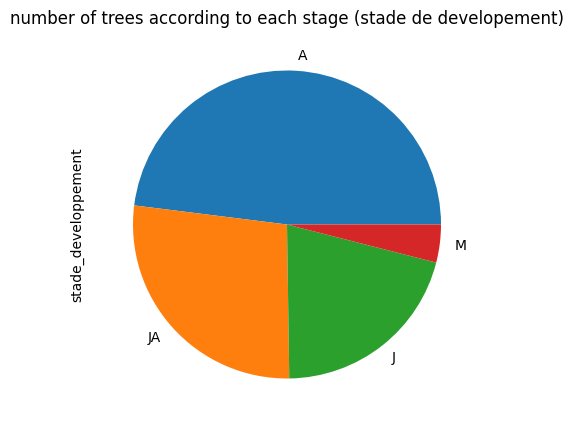

In [6]:
nb_tree_stage_dev.plot(kind='pie', title='number of trees according to each stage (stade de developement)', figsize=(6, 5), );


#### The average height for each stage of a tree\'s development

In [7]:
mean_each_stage = df.groupby(['stade_developpement'])['hauteur_m'].mean().sort_values()
mean_each_stage

stade_developpement
J      5.836440
JA     9.086832
A     12.888571
M     18.302606
Name: hauteur_m, dtype: float64

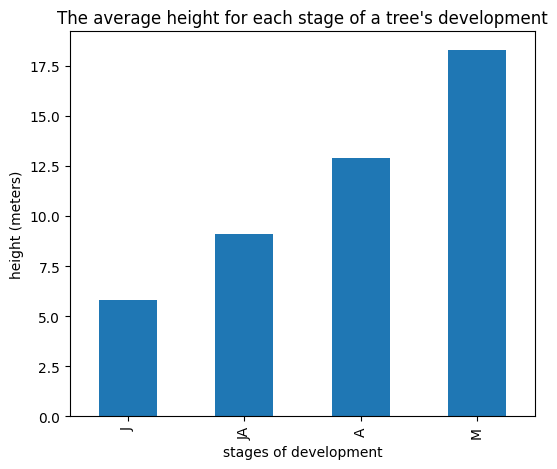

In [8]:
mean_each_stage.plot(kind='bar', title='The average height for each stage of a tree\'s development', ylabel='height (meters)',
         xlabel='stages of development', figsize=(6, 5), );


#### The average height for each stage of a tree\'s development and each kind (genre colum)

In [9]:
data_genre_dev = df.groupby(['genre'])['stade_developpement'].value_counts()
data_genre_dev

genre              stade_developpement
Abelia             A                       1
                   J                       0
                   JA                      0
                   M                       0
Abies              A                      13
                                          ..
x Chitalpa         M                       0
x Cupressocyparis  J                      72
                   A                       9
                   JA                      9
                   M                       3
Name: stade_developpement, Length: 588, dtype: int64

#### I focus on 1 kind (genre) of tree. And the exemple bellow, I select `x Cupressocyparis`

In [10]:
data_genre_dev['x Cupressocyparis']

stade_developpement
J     72
A      9
JA     9
M      3
Name: stade_developpement, dtype: int64

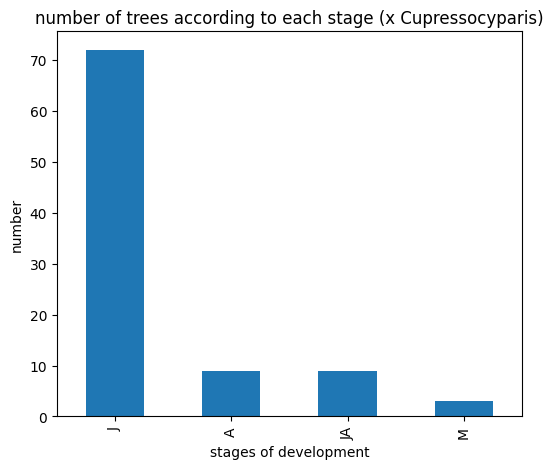

In [11]:
data_genre_dev['x Cupressocyparis'].plot(kind='bar', title='number of trees according to each stage (x Cupressocyparis)', ylabel='number',
         xlabel='stages of development', figsize=(6, 5), );


In [12]:
df_test = df.groupby(['genre', 'stade_developpement'])['hauteur_m'].mean()
df_test

genre              stade_developpement
Abelia             A                       6.000000
                   J                            NaN
                   JA                           NaN
                   M                            NaN
Abies              A                      14.692308
                                            ...    
x Chitalpa         M                            NaN
x Cupressocyparis  A                      11.437037
                   J                       7.916667
                   JA                      8.548148
                   M                      12.000000
Name: hauteur_m, Length: 588, dtype: float64

The average height of a  for each stage development of a specific kind of tree\'s (x Cupressocyparis)

In [13]:
df_test['x Cupressocyparis'].sort_values()

stade_developpement
J      7.916667
JA     8.548148
A     11.437037
M     12.000000
Name: hauteur_m, dtype: float64

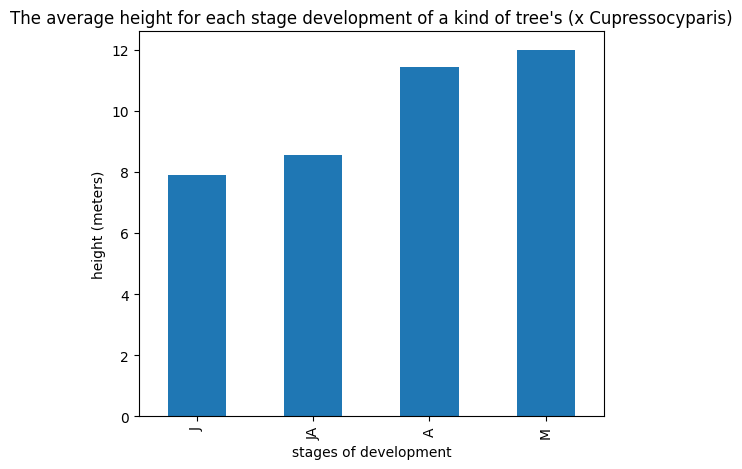

In [14]:
df_test['x Cupressocyparis'].sort_values().plot(kind='bar', title='The average height for each stage development of a kind of tree\'s (x Cupressocyparis)', ylabel='height (meters)',
         xlabel='stages of development', figsize=(6, 5), );


### The mature trees by district

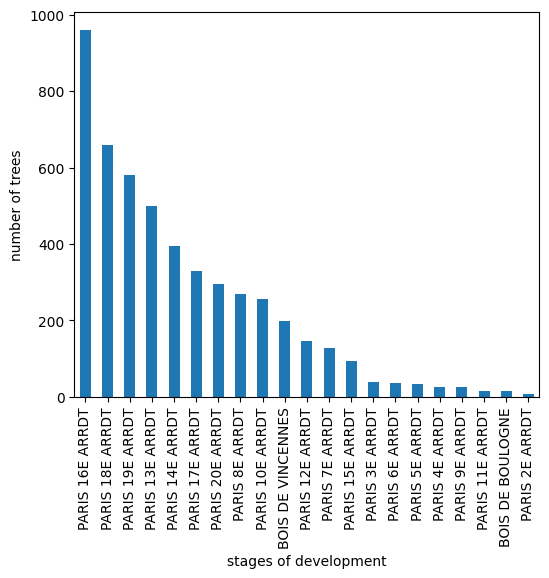

In [15]:
df_maturite = df.groupby(['arrondissement']).apply(lambda x: x[x['stade_developpement'] == 'M' ]['id'].count()).sort_values(ascending=False)[:21]
df_maturite.plot(kind='bar', title='', ylabel='number of trees',
         xlabel='stages of development', figsize=(6, 5), );



We can see the oldest tree are most present in the most outlying districts